In [2]:
#Importing libraries

import pandas as pd
import numpy as np

#import datavisualisation libraries

import seaborn as sns
#allows plots to appear and be stored in notebook
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#import algorithms

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

In [3]:
#get data 

train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")

In [4]:
#explore training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploring Data Patterns

Things to note from dataset:
* Many features must be converted to numerics
* Almost 38% survived
* There are different ranges of features
* Many NaN values

In [6]:
#Exploring Missing values

total_null = train.isnull().sum().sort_values(ascending = False)
percent_null = ((train.isnull().sum() / train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent_null], axis =1, keys = ['Total', 'Percent'])
missing_data.head()

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000


In [7]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## Sex

In [8]:
##Using pivot tables, we can segment the table by sex and calculate the mean of the number of people who survived
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot

,Survived
Sex,
female,0.742038
male,0.188908


Most Females survived

 ## Sex and Age

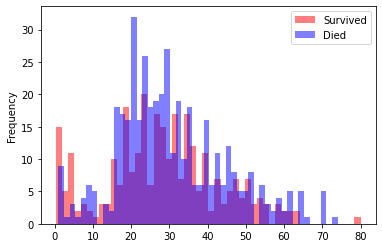

In [9]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

Text(0.5, 1.0, 'Male')

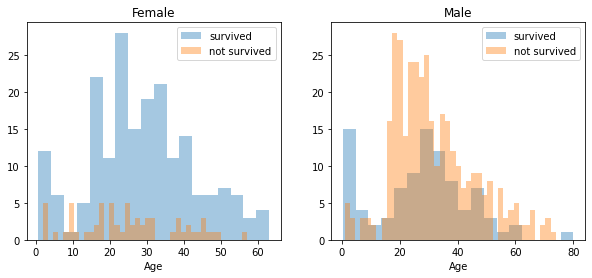

In [10]:
#Relation between Sex and Age

survived='survived'
not_survived = 'not survived'

women = train[train['Sex'] == 'female']
men = train[train['Sex'] == 'male']

fig, axes = plt.subplots(nrows=1, ncols = 2, figsize = (10,4))

#Creating a Distribution histogram plot
#kde in sns.displot is a boolean whether to plot gaussian density estimate, ax if provided, plot on axes
#Number of bins is different because the ratio of survived v. non survived is skewed

#Age-Sex for women 
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

#Age-Sex for Men
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

Men have a higher chance of survival between 20-40, whereas women between 15-45 survive more. 
Infants have a higher chance of survival

## PClass

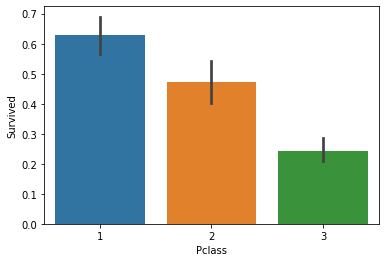

In [11]:
sns.barplot(x = 'Pclass', y='Survived', data = train)

#using pivot tables:

#pclass_pivot = train.pivot_table(index="Pclass",values="Survived")
#pclass_pivot.plot.bar()
#plt.show()


Class 1 increasingly survived

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


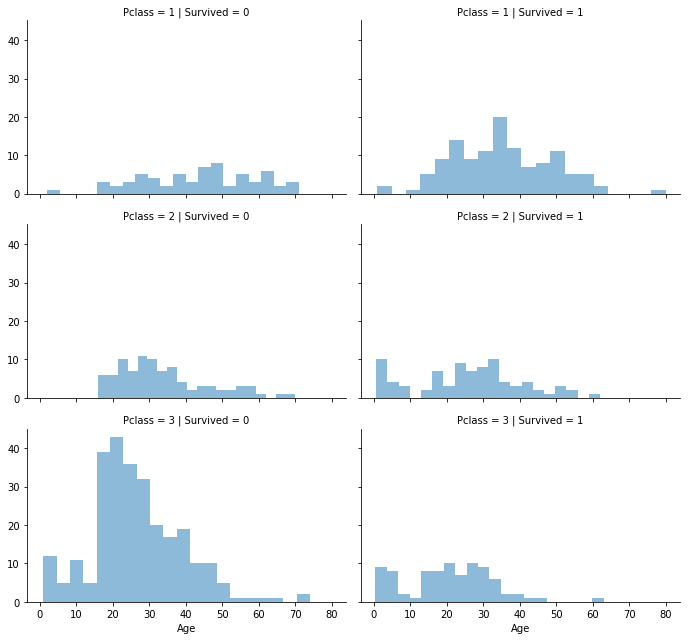

In [12]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=3, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## PClass, Embarked, Sex

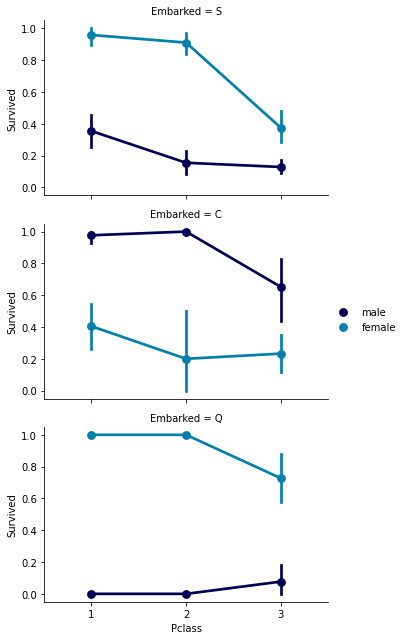

In [13]:
#Using FacetGrids (multiplot gtid for conditional relationships)

FacetGrid = sns.FacetGrid(train, row = 'Embarked', size = 3, aspect = 1.6)

FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette= "ocean",  order=None, hue_order=None )
FacetGrid.add_legend()

Women on Port S and Q have a higher chance of survival and Men on port C, showing that embarked is correlated to gender.

## SibSp and Parch

* SibSp: Number of siblings/spouses aboard
* Parch: Number of parents/children aboard

In [14]:
data = [train, test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


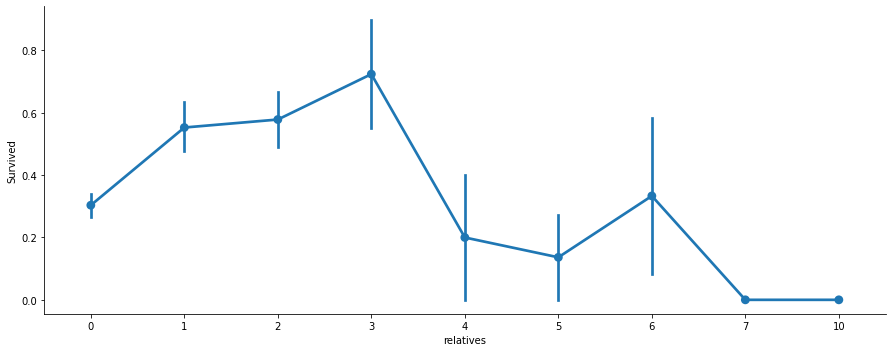

In [15]:
axes = sns.factorplot('relatives','Survived', 
                      data=train, aspect = 2.5, )

More survival with 1, 3, or 6 relatives

# Preprocessing

In [16]:
#cut pasanger id

train = train.drop(['PassengerId'], axis=1)

## Handling Missing Data

### Cabin

In [17]:
#Cabin Data
#in the cabin, data is of the form C123, where C is the deck
#convert missing numerical data to 0, and unknown decks to U

import re

deck =  {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna('U0')
    #group to return the output that is matched
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
#drop Cabin
train = train.drop(['Cabin'], axis =1)
test = test.drop(['Cabin'], axis =1)

### Age

In [18]:
#fill age with random values based on mean age within std deviation

data = [train, test]

for dataset in data:
    mean = train["Age"].mean()
    std = train["Age"].std()
    is_null = dataset['Age'].isnull().sum()
    
    #compute random numbers between mean
    #we want the number of samples drawn to be equal to the number of null values
    rand_age = np.random.randint(mean-std, mean +std, size= is_null)
    
    #fill NaN values with random integers
    age = dataset['Age'].copy()
    age[np.isnan(age)] = rand_age
    dataset['Age'] = age
    dataset['Age'] = dataset['Age'].astype(int)
    
#Check if any NaNs remain

train['Age'].isnull().sum()

0

### Embarked

In [19]:
#only two missing values, will be filled with most common value

train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [20]:
#top value is S

top = 'S'

data = [train,test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(top)
    
#Check if any NaNs remain
train['Embarked'].isnull().sum()

0

## Converting Features into Compatible Types

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int64
Deck         891 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


### Fare

In [22]:
data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

### Name

In [23]:
# Extract titles from the names

data = [train, test]

titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    #extract titles
    #expand if True, return DataFrame with one column per capture group. 
    #If False, return a Series/Index if there is one capture group or DataFrame if there are multiple capture groups.
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
    
#remove names
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

### Sex

In [24]:
#convert sex into numeric

gender = {'male': 0, 'female': 1}

data = [train,test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)

### Ticket

In [25]:
train['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [26]:
#cant put 681 unique into meaningful categories, so drop

train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

### Embarked

In [27]:
#Convert to numeric
ports = {"S": 0, "C": 1, "Q": 2}
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

## Category Creation

### Age

In [28]:
#Make numeric categories of Ages with a somewhat uniform distribution

data = [train, test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# check distribution
train['Age'].value_counts()

6    171
4    157
5    152
3    137
2    119
1     87
0     68
Name: Age, dtype: int64

### Fare

In [29]:
#check distribution

pd.qcut(train['Fare'],6)

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] < (26.0, 52.0] < (52.0, 512.0]]

In [30]:
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 52, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

## Creating New Features

We've seen that there is a correlation between age and class

In [31]:
data = [train, test]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

Check fare per person

In [32]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

In [33]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,5,1,1,0,3,3,5,2
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,5,0,1,0,3,3,5,2
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1


# ML Model Build

In [34]:
#Training input and labels

X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]

#X_test = test
X_test = test.drop("PassengerId", axis = 1).copy()

## Stochastic Gradient Descent

In [35]:
#to is the stopping criterion. 
#If it is not None, the iterations will stop when (loss > best_loss - tol) for n_iter_no_change consecutive epochs.

sgd = linear_model.SGDClassifier(max_iter = 5, tol = None)
sgd.fit(X_train, Y_train)

Y_pred = sgd.predict(X_test)

sgd_score = sgd.score(X_train,Y_train)

#accuracy
sgd_acc = round(sgd_score*100, 2)


## Logistic Regression

In [36]:
lg = LogisticRegression(max_iter = 200 )
lg.fit(X_train, Y_train)

Y_pred = lg.predict(X_test)

lg_score = lg.score(X_train, Y_train)

lg_acc = round(lg_score*100, 2)

## Random Forest

In [37]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)

Y_prediction = rf.predict(X_test)

rf_score= rf.score(X_train, Y_train)
rf_acc = round(rf_score * 100, 2)

## Decision Tree

In [38]:
dt = DecisionTreeClassifier() 
dt.fit(X_train, Y_train)

Y_pred = dt.predict(X_test)  

dt_score = dt.score(X_train, Y_train)
dt_acc = round(dt_score * 100, 2)


## Perceptron

In [39]:
perceptron = Perceptron(max_iter=50)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

perceptron_score = perceptron.score(X_train, Y_train)
perceptron_acc = round(perceptron_score * 100, 2)

## K Nearest Neighbours

In [40]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  

Y_pred = knn.predict(X_test)  

knn_score= knn.score(X_train, Y_train)

knn_acc = round(knn_score * 100, 2)

## Linear SVC

In [41]:
lsvc = LinearSVC(max_iter = 15000)
lsvc.fit(X_train, Y_train)

Y_pred = lsvc.predict(X_test)

lsvc_score= lsvc.score(X_train, Y_train)

lsvc_acc = round(lsvc_score * 100, 2)

## Gaussian Naive Bayes

In [42]:
gnb = GaussianNB() 
gnb.fit(X_train, Y_train)  

Y_pred = gnb.predict(X_test)  

gnb_score = gnb.score(X_train, Y_train)

gnb_acc= round(gnb_score * 100, 2)

# Selecting the Best Model

In [43]:


results_df = pd.DataFrame({
    'Model': ['Stochastic Gradient Decent', 'Logistic Regression', 'Random Forest', 'Decision Tree',
              'Perceptron', 'K Nearest Neighbours ', 'Support Vector Machines', 'Gaussian Naive Bayes' ],
    'Accuracy': [sgd_acc,lg_acc, rf_acc,dt_acc, perceptron_acc, knn_acc, lsvc_acc, gnb_acc ]})
results = results_df.sort_values(by = "Accuracy", ascending = False)
results = results.set_index('Accuracy')

results.head(9)

,Model
Accuracy,
92.93,Random Forest
92.93,Decision Tree
87.43,K Nearest Neighbours
81.48,Logistic Regression
81.26,Support Vector Machines
80.47,Stochastic Gradient Decent
78.00,Gaussian Naive Bayes
63.08,Perceptron


Random forests seem to perform best. Apply K- fold Cross Validation

# Random Forest Classifier

# K-Fold Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score

rf_k = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf_k, X_train, Y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81111111 0.84269663 0.71910112 0.80898876 0.87640449 0.83146067
 0.80898876 0.74157303 0.86516854 0.83146067]
Mean: 0.8136953807740325
Standard Deviation: 0.04717509094753655


Avarage accuracy of 82%, more realistic than before

# Feature Importance

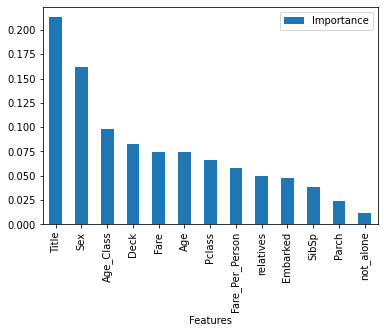

In [45]:
importance_df = pd.DataFrame({'Features': X_train.columns, 'Importance': rf.feature_importances_})

importance = importance_df.sort_values('Importance', ascending = False).set_index('Features')

importance.plot.bar()

We can drop Parch and not_alone as they do not seem to have any major importance

In [46]:

train = train.drop('Parch', axis = 1)
test = test.drop('Parch', axis = 1)

train = train.drop('not_alone', axis = 1)
test = test.drop('not_alone', axis = 1)

In [47]:
## retraining
## use out of bag samples to estimate generalised accuracy
## oob uses test set of the size of training set


rf = RandomForestClassifier(n_estimators=100,oob_score = True )
rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

rf_score = rf.score(X_train, Y_train)

rf_acc = round(rf_score*100, 2)

print("Random Forest Accuracy is ", rf_acc, "%")

rf_oob = (rf.oob_score)*100

print("Random Forest Out Of Bag Score is is ", rf_oob, "%")

Random Forest Accuracy is  92.93 %
Random Forest Out Of Bag Score is is  100 %


# Hyperparameter Tuning

#Markdown as running takes time

#param grid specifies the parameter values to iterate

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

##n_jobs: The number of jobs to run in parallel,  -1 means using all processors.

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.bestparams


In [48]:
#Based on the parameters obtained, plug in


rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

rf.fit(X_train, Y_train)
Y_prediction = rf.predict(X_test)

rf.score(X_train, Y_train)

print("oob score:", round(rf.oob_score_, 4)*100, "%")

oob score: 83.28 %


# Further Evaluation

## Confusion Matrix

In [49]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(rf, X_train, Y_train, cv=3)

cm = confusion_matrix(Y_train, predictions)
pd.DataFrame(cm, columns=['Survived', 'Died'], index=[['Survived', 'Died']])

,Survived,Died
Survived,490,59
Died,95,247


## Precision and Recall

In [50]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8071895424836601
Recall: 0.7222222222222222


* Precision tells us that 83% of the time, the passenger survived correctly
* Recall tells us that model predicts the survival of 71% of passengers who actually survived

## F1 Score

In [51]:
from sklearn.metrics import f1_score
print("F1 Score:", f1_score(Y_train, predictions))

F1 Score: 0.7623456790123457


## Precision Recall Curve against Threshold

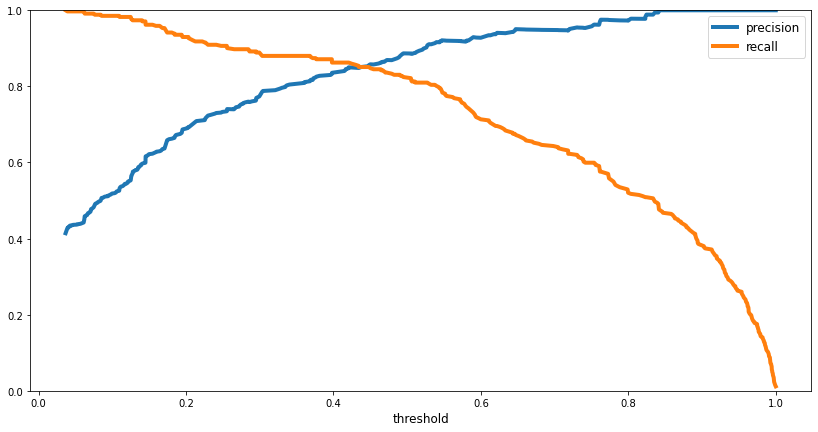

In [52]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = rf.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], label="precision", linewidth=4)
    plt.plot(threshold, recall[:-1],  label="recall", linewidth=4)
    plt.xlabel("threshold", fontsize=12)
    plt.legend(loc="upper right", fontsize=12)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Threshold that gives least precision recall tradeoff is around 0.4

## ROC AUC Score

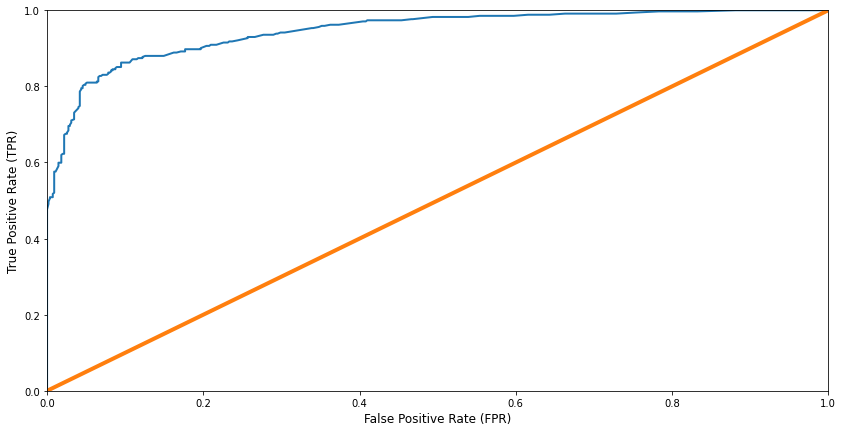

In [53]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1],  linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=12)
    plt.ylabel('True Positive Rate (TPR)', fontsize=12)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.945016989955155


# Making a submission

In [55]:
testcopy = X_test

testcopy.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'relatives', 'not_alone', 'Deck', 'Title', 'Age_Class',
       'Fare_Per_Person'],
      dtype='object')

In [56]:
testcopy = X_test

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, Y_train)

testprediction = rf.predict(testcopy)

testprediction

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [62]:
testids = test["PassengerId"]
submission_df = {"PassengerId": testids,
                 "Survived": testprediction}

submission = pd.DataFrame(submission_df)
submission


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('titanic_submission.csv', index=False)